In [1]:
from google.colab import files
uploaded = files.upload()

Saving dermatology.csv to dermatology.csv


In [2]:
import io
import pandas as pd
derma = pd.read_csv(io.BytesIO(uploaded['dermatology.csv']))

In [3]:
derma.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [4]:
derma.shape

(366, 35)

In [5]:
derma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [6]:
derma.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [7]:
median = derma["age"].median()  
derma["age"].fillna(median, inplace=True)

In [8]:
derma['age'].isnull().sum()

0

In [9]:
derma.nunique()

erythema                                     4
scaling                                      4
definite_borders                             4
itching                                      4
koebner_phenomenon                           4
polygonal_papules                            4
follicular_papules                           4
oral_mucosal_involvement                     4
knee_and_elbow_involvement                   4
scalp_involvement                            4
family_history                               2
melanin_incontinence                         4
eosinophils_in_the_infiltrate                3
pnl_infiltrate                               4
fibrosis_of_the_papillary_dermis             4
exocytosis                                   4
acanthosis                                   4
hyperkeratosis                               4
parakeratosis                                4
clubbing_of_the_rete_ridges                  4
elongation_of_the_rete_ridges                4
thinning_of_t

In [10]:
derma['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

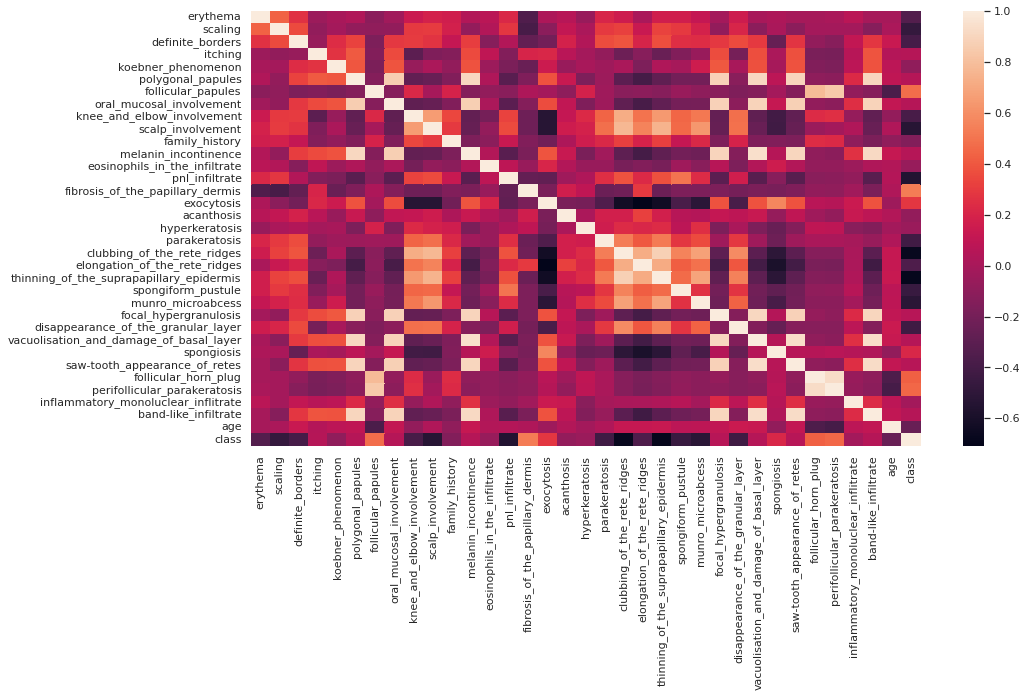

In [11]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(derma.corr())

In [12]:
X = derma.iloc[: , :-1].values
y = derma.iloc[: , -1].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

# SVC

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [17]:
y_pred = svm_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_svm_clf = accuracy_score(y_test, y_pred)
accuracy_svm_clf.round(2)

0.99

In [20]:
svm_clf_pca = svm_clf.fit(X_reduced, y_train)

In [22]:
X_test_reduced = pca.transform(X_test)
y_pred_pca = svm_clf_pca.predict(X_test_reduced)

In [40]:
accuracy_svm_clf_pca = accuracy_score(y_test, y_pred_pca)
accuracy_svm_clf_pca.round(2) #it seems work better without pca

0.65

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn_clf.predict(X_test)

In [39]:
accuracy_knn_clf = accuracy_score(y_test, y_pred)
accuracy_knn_clf.round(2)

0.99

In [31]:
knn_clf_pca = knn_clf.fit(X_reduced, y_train)

In [32]:
y_pred_pca = knn_clf_pca.predict(X_test_reduced)

In [38]:
accuracy_knn_clf_pca = accuracy_score(y_test, y_pred_pca)
accuracy_knn_clf_pca.round(2) #knn fits better without pca

0.65

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [35]:
y_pred = rnd_clf.predict(X_test)

In [37]:
accuracy_rnd_clf = accuracy_score(y_test, y_pred)
accuracy_rnd_clf.round(2)

0.99

In [42]:
rnd_clf_pca = rnd_clf.fit(X_reduced, y_train)

In [43]:
y_pred_pca = rnd_clf_pca.predict(X_test_reduced)

In [44]:
accuracy_rnd_clf_pca = accuracy_score(y_test, y_pred_pca)
accuracy_rnd_clf_pca.round(2) #it is not too bad with pca

0.8

# SGD

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [52]:
accuracy_sgd_clf = accuracy_score(y_test, y_pred)
accuracy_sgd_clf.round(2)

0.96

In [53]:
sgd_clf_pca = sgd_clf.fit(X_reduced, y_train)

In [54]:
y_pred_pca = sgd_clf.predict(X_test_reduced)

In [55]:
accuracy_sgd_clf_pca = accuracy_score(y_test, y_pred_pca)
accuracy_sgd_clf_pca.round(2) #the accuracy with pca is less than the accuracy of model without pca

0.7

# Decision Tree 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(1, 7)), 'min_samples_split': [2, 3, 4]}
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

In [58]:
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [59]:
y_pred = grid_search_DT.best_estimator_.predict(X_test)

In [61]:
accuracy_grid_search_DT = accuracy_score(y_test, y_pred)
accuracy_grid_search_DT.round(2)

0.99

In [62]:
grid_search_DT.fit(X_reduced, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [63]:
y_pred_pca = grid_search_DT.best_estimator_.predict(X_test_reduced)

In [64]:
accuracy_grid_search_DT = accuracy_score(y_test, y_pred_pca)
accuracy_grid_search_DT.round(2) 

0.76

In [ ]:
# the accuracy of models decreases with pca but it makes them more simple and decreases their complexity 

# Voting Classifier

In [88]:
from sklearn.ensemble import VotingClassifier

estimators = [svm_clf, knn_clf, rnd_clf, sgd_clf, grid_search_DT]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])
Training the KNeighborsClassifier(n_neighbors=3)
Training the RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)
Training the SGDClassifier(random_state=42)
Training the GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})


In [89]:
[estimator.score(X_test, y_test) for estimator in estimators]

[0.9864864864864865,
 0.8513513513513513,
 0.9864864864864865,
 0.9594594594594594,
 0.9864864864864865]

In [90]:
named_estimators = [("svc_clf", svm_clf), ("knn_clf", knn_clf), ("random_forest_clf", rnd_clf), 
                    ("stochastic_dg_clf", sgd_clf), ("decision_tree_clf", grid_search_DT)]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc_clf',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC(random_state=42))])),
                             ('knn_clf', KNeighborsClassifier(n_neighbors=3)),
                             ('random_forest_clf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('stochastic_dg_clf',
                              SGDClassifier(random_state=42)),
                             ('decision_tree_clf',
                              GridSearchCV(cv=3,
                                           estimator=DecisionTreeClassifier(random_state=42),
                               

In [91]:
voting_clf.score(X_test, y_test) #voting works well on this dataset

0.9864864864864865

# Stacking

In [84]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators = named_estimators, 
                                  final_estimator = svm_clf, cv=5)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('svc_clf',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(random_state=42))])),
                               ('knn_clf', KNeighborsClassifier(n_neighbors=3)),
                               ('random_forest_clf',
                                RandomForestClassifier(max_leaf_nodes=16,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('stochastic_dg_clf',
                                SGDClassifier(random_state=42)),
                               ('decision_tree_clf',
                                GridSearchCV(cv=3,
                       

In [85]:
stacking_clf.score(X_test, y_test) #this problem with stacking and SVC for final estimator, gives us the best accuracy

1.0